## Definindo o Problema

In [75]:
#!pip install Catboost;
#!pip install pymoo;
#!pip install -U pyrecorder;

In [76]:
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from yellowbrick.classifier import ConfusionMatrix
import numpy as np
from tqdm.notebook import tqdm as tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
#from google.colab import drive
import pandas as pd
import pickle
from pymoo.algorithms.soo.nonconvex.pso import PSO, PSOAnimation
#from pymoo.factory import Rastrigin
from pymoo.optimize import minimize
import matplotlib.pyplot as plt
from pymoo.factory import get_termination
#from pymoo.util.display import Display
from pymoo.core.callback import Callback

In [77]:
from catboost import CatBoostClassifier

In [78]:
#drive.mount('/content/gdrive')

In [79]:
#with open('/content/gdrive/MyDrive/datasets/credit.pkl', 'rb') as f:
#    x_wine_train, x_wine_test, y_wine_train, y_wine_test = pickle.load(f)
    
#with open('./wine.pkl', 'rb') as f:
#    x_wine, y_wine = pickle.load(f)
    
with open('./wine.pkl', 'rb') as f:
    x_wine, y_wine = pickle.load(f)

Definindo as restrições 

In [80]:
DIMENSIONS = 24

In [81]:
iterations_min = 20  #n_estimators n_estimators #INT
learning_rate_min = 0.001  #FLOAT
l2_leaf_reg_min = 0.01  #FLOAT reg_lambda
bagging_temperature_min = 0.001  # float
subsample_min = 1.0   #float 
mvs_reg_min = 0.001  #float 0 - inf
random_strength_min = 0.001  #float 1.0 
use_best_model_min = False  #bool true false
best_model_min_trees_min = 1  #int 
depth_min = 1  #max_depth 8 int
min_data_in_leaf_min = 1  #min_child_samples int
max_leaves_min = 10  #num_leaves int 
one_hot_max_size_min = 1  #int 
rsm_min = 0.001  #colsample_bylevel float (0;1]
fold_permutation_block_min = 1  #int 
leaf_estimation_iterations_min = 1  #int
fold_len_multiplier_min = 2.0  #float
approx_on_full_history_min = False  #bool 
boost_from_average_min = False  #bool 
diffusion_temperature_min = 1000  #float 10000
posterior_sampling_min = False  #bool
allow_const_label_min = False  #bool
penalties_coefficient_min = 1.0  #float
model_shrink_rate_min = 0.001  #float

iterations_max = 100  #n_estimators n_estimators #INT
learning_rate_max = 0.5  #FLOAT
l2_leaf_reg_max = 0.01  #FLOAT reg_lambda
bagging_temperature_max = 10000.0  # float
subsample_max = 2.0  #float 
mvs_reg_max = 1000.0  #float 0 - inf
random_strength_max = 10.0  #float 1.0 
use_best_model_max = True  #bool true false
best_model_min_trees_max = 10  #int 
depth_max = 8  #max_depth 8 int 
min_data_in_leaf_max = 100  #min_child_samples int
max_leaves_max = 10  #num_leaves int 
one_hot_max_size_max = 20  #int 
rsm_max = 1.0   #colsample_bylevel float (0;1]
fold_permutation_block_max = 100  #int 
leaf_estimation_iterations_max = 100  #int
fold_len_multiplier_max = 10.0  #float
approx_on_full_history_max = True  #bool 
boost_from_average_max = True  #bool 
diffusion_temperature_max = 50000  #float 10000
posterior_sampling_max = True  #bool
allow_const_label_max = True  #bool
penalties_coefficient_max = 10.0  #float
model_shrink_rate_max = 1.0  #float

grow_policy = 'Lossguide'

In [82]:
iterations_min = 20  #n_estimators n_estimators #INT
learning_rate_min = 0.001  #FLOAT
l2_leaf_reg_min = 0.01  #FLOAT reg_lambda
bagging_temperature_min = 0.001  # float
subsample_min = 1.0   #float 
mvs_reg_min = 0.001  #float 0 - inf
random_strength_min = 0.001  #float 1.0 
use_best_model_min = False  #bool true false
best_model_min_trees_min = 1  #int 
depth_min = 1  #max_depth 8 int
min_data_in_leaf_min = 1  #min_child_samples int
max_leaves_min = 1  #num_leaves int 
one_hot_max_size_min = 1  #int 
rsm_min = 0.001  #colsample_bylevel float (0;1]
fold_permutation_block_min = 1  #int 
leaf_estimation_iterations_min = 1  #int
fold_len_multiplier_min = 2.0  #float
approx_on_full_history_min = False  #bool 
boost_from_average_min = False  #bool 
diffusion_temperature_min = 1000  #float 10000
posterior_sampling_min = False  #bool
allow_const_label_min = False  #bool
penalties_coefficient_min = 1.0  #float
model_shrink_rate_min = 0.001  #float

iterations_max = 100  #n_estimators n_estimators #INT
learning_rate_max = 0.5  #FLOAT
l2_leaf_reg_max = 0.01  #FLOAT reg_lambda
bagging_temperature_max = 10000.0  # float
subsample_max = 2.0  #float 
mvs_reg_max = 1000.0  #float 0 - inf
random_strength_max = 10.0  #float 1.0 
use_best_model_max = True  #bool true false
best_model_min_trees_max = 10  #int 
depth_max = 8  #max_depth 8 int 
min_data_in_leaf_max = 100  #min_child_samples int
max_leaves_max = 10  #num_leaves int 
one_hot_max_size_max = 20  #int 
rsm_max = 1.0   #colsample_bylevel float (0;1]
fold_permutation_block_max = 100  #int 
leaf_estimation_iterations_max = 100  #int
fold_len_multiplier_max = 10.0  #float
approx_on_full_history_max = True  #bool 
boost_from_average_max = True  #bool 
diffusion_temperature_max = 50000  #float 10000
posterior_sampling_max = True  #bool
allow_const_label_max = True  #bool
penalties_coefficient_max = 10.0  #float
model_shrink_rate_max = 1.0  #float

grow_policy = 'Lossguide'

Definindo o problema

In [83]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem

class OptimizeWithAccuracy(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var= DIMENSIONS,
                         n_obj=1,
                         n_constr=25,
                         xl=np.array([iterations_min,
                          learning_rate_min,
                          l2_leaf_reg_min,
                          bagging_temperature_min,
                          subsample_min,
                          mvs_reg_min,
                          random_strength_min,
                          use_best_model_min,
                          best_model_min_trees_min,
                          depth_min,
                          min_data_in_leaf_min,
                          max_leaves_min,
                          one_hot_max_size_min,
                          rsm_min,
                          fold_permutation_block_min,
                          leaf_estimation_iterations_min,
                          fold_len_multiplier_min,
                          approx_on_full_history_min,
                          boost_from_average_min,
                          diffusion_temperature_min,
                          posterior_sampling_min,
                          allow_const_label_min,
                          penalties_coefficient_min,
                          model_shrink_rate_min]),
                         xu=np.array([iterations_max,
                            learning_rate_max,
                            l2_leaf_reg_max,
                            bagging_temperature_max,
                            subsample_max,
                            mvs_reg_max,
                            random_strength_max,
                            use_best_model_max,
                            best_model_min_trees_max,
                            depth_max,
                            min_data_in_leaf_max,
                            max_leaves_max,
                            one_hot_max_size_max,
                            rsm_max,
                            fold_permutation_block_max,
                            leaf_estimation_iterations_max,
                            fold_len_multiplier_max,
                            approx_on_full_history_max,
                            boost_from_average_max,
                            diffusion_temperature_max,
                            posterior_sampling_max,
                            allow_const_label_max,
                            penalties_coefficient_max,
                            model_shrink_rate_max])
                        )

    def _evaluate(self, x, out, *args, **kwargs):
        #num_leaves, min_child_samples, n_estimators, learning_rate, subsample_for_bin, min_split_gain, min_child_weight, reg_alpha, reg_lambda
        
        model_catboost = CatBoostClassifier(#num_leaves        = int(np.round(x[0])), 
                                       #extra_trees = bool(np.round(x[16])), #boolean
                                        iterations = int(np.round(x[0])),
                                        
                                        learning_rate = x[1],
                                        l2_leaf_reg = x[2],
                                        bagging_temperature = x[3],
                                        #subsample = x[4],
                                        #mvs_reg = x[5],
                                        random_strength = x[6],
                                        #use_best_model = bool(np.round(x[7])),
                                        best_model_min_trees = int(np.round(x[8])), 
                                        depth = int(np.round(x[9])), 
                                        min_data_in_leaf = int(np.round(x[10])), 
                                        max_leaves = int(np.round(x[11])), 
                                        one_hot_max_size = int(np.round(x[12])), 
                                        rsm = x[13],
                                        fold_permutation_block = int(np.round(x[14])), 
                                        leaf_estimation_iterations = int(np.round(x[15])), 
                                        fold_len_multiplier = x[16],
                                        approx_on_full_history = False, #bool(np.round(x[17])),
                                        #boost_from_average = bool(np.round(x[18])),
                                        #diffusion_temperature = x[19],
                                        posterior_sampling = bool(np.round(x[20])),
                                        allow_const_label = bool(np.round(x[21])),
                                        penalties_coefficient = x[22],
                                        model_shrink_rate = x[23],
                                        loss_function='MultiClass',
                                        grow_policy = 'Lossguide',
                                        thread_count = -1
                                       )
        
        kfold = KFold(n_splits = 3, shuffle = True)
        
        scores = cross_val_score(model_catboost, x_wine, y_wine, cv = kfold, n_jobs=-1)  
        result = scores.mean()
        #if not result:
        #  result = 0
        
        out['F'] = -1 * result

problemAccuracy = OptimizeWithAccuracy()

In [84]:
class OptimizeWithF1(ElementwiseProblem):
        def __init__(self):
                super().__init__(n_var= DIMENSIONS,
                         n_obj=1,
                         n_constr=25,
                         xl=np.array([iterations_min,
                          learning_rate_min,
                          l2_leaf_reg_min,
                          bagging_temperature_min,
                          subsample_min,
                          mvs_reg_min,
                          random_strength_min,
                          use_best_model_min,
                          best_model_min_trees_min,
                          depth_min,
                          min_data_in_leaf_min,
                          max_leaves_min,
                          one_hot_max_size_min,
                          rsm_min,
                          fold_permutation_block_min,
                          leaf_estimation_iterations_min,
                          fold_len_multiplier_min,
                          approx_on_full_history_min,
                          boost_from_average_min,
                          diffusion_temperature_min,
                          posterior_sampling_min,
                          allow_const_label_min,
                          penalties_coefficient_min,
                          model_shrink_rate_min]),
                         xu=np.array([iterations_max,
                            learning_rate_max,
                            l2_leaf_reg_max,
                            bagging_temperature_max,
                            subsample_max,
                            mvs_reg_max,
                            random_strength_max,
                            use_best_model_max,
                            best_model_min_trees_max,
                            depth_max,
                            min_data_in_leaf_max,
                            max_leaves_max,
                            one_hot_max_size_max,
                            rsm_max,
                            fold_permutation_block_max,
                            leaf_estimation_iterations_max,
                            fold_len_multiplier_max,
                            approx_on_full_history_max,
                            boost_from_average_max,
                            diffusion_temperature_max,
                            posterior_sampling_max,
                            allow_const_label_max,
                            penalties_coefficient_max,
                            model_shrink_rate_max])
                        )

        def _evaluate(self, x, out, *args, **kwargs):
                #num_leaves, min_child_samples, n_estimators, learning_rate, subsample_for_bin, min_split_gain, min_child_weight, reg_alpha, reg_lambda
                
                model_catboost = CatBoostClassifier(#num_leaves        = int(np.round(x[0])), 
                                        #extra_trees = bool(np.round(x[16])), #boolean
                                                iterations = int(np.round(x[0])),
                                        
                                        learning_rate = x[1],
                                        l2_leaf_reg = x[2],
                                        bagging_temperature = x[3],
                                        #subsample = x[4],
                                        #mvs_reg = x[5],
                                        random_strength = x[6],
                                        #use_best_model = bool(np.round(x[7])),
                                        best_model_min_trees = int(np.round(x[8])), 
                                        depth = int(np.round(x[9])), 
                                        min_data_in_leaf = int(np.round(x[10])), 
                                        max_leaves = int(np.round(x[11])), 
                                        one_hot_max_size = int(np.round(x[12])), 
                                        rsm = x[13],
                                        fold_permutation_block = int(np.round(x[14])), 
                                        leaf_estimation_iterations = int(np.round(x[15])), 
                                        fold_len_multiplier = x[16],
                                        approx_on_full_history = False, #bool(np.round(x[17])),
                                        #boost_from_average = bool(np.round(x[18])),
                                        #diffusion_temperature = x[19],
                                        posterior_sampling = bool(np.round(x[20])),
                                        allow_const_label = bool(np.round(x[21])),
                                        penalties_coefficient = x[22],
                                        model_shrink_rate = x[23],
                                        loss_function='MultiClass',
                                        grow_policy = 'Lossguide',
                                        thread_count = -1
                                        )
                
                kfold = KFold(n_splits = 3, shuffle = True)

                scores = cross_val_score(model_catboost, x_wine, y_wine, cv = kfold, scoring='f1_weighted', n_jobs=-1)  
                
                result = scores.mean()
                out['F'] = -1 * result

problemF1 = OptimizeWithF1()

In [85]:
class OptimizeWithAUC(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var= DIMENSIONS,
                         n_obj=1,
                         n_constr=25,
                         xl=np.array([iterations_min,
                          learning_rate_min,
                          l2_leaf_reg_min,
                          bagging_temperature_min,
                          subsample_min,
                          mvs_reg_min,
                          random_strength_min,
                          use_best_model_min,
                          best_model_min_trees_min,
                          depth_min,
                          min_data_in_leaf_min,
                          max_leaves_min,
                          one_hot_max_size_min,
                          rsm_min,
                          fold_permutation_block_min,
                          leaf_estimation_iterations_min,
                          fold_len_multiplier_min,
                          approx_on_full_history_min,
                          boost_from_average_min,
                          diffusion_temperature_min,
                          posterior_sampling_min,
                          allow_const_label_min,
                          penalties_coefficient_min,
                          model_shrink_rate_min]),
                         xu=np.array([iterations_max,
                            learning_rate_max,
                            l2_leaf_reg_max,
                            bagging_temperature_max,
                            subsample_max,
                            mvs_reg_max,
                            random_strength_max,
                            use_best_model_max,
                            best_model_min_trees_max,
                            depth_max,
                            min_data_in_leaf_max,
                            max_leaves_max,
                            one_hot_max_size_max,
                            rsm_max,
                            fold_permutation_block_max,
                            leaf_estimation_iterations_max,
                            fold_len_multiplier_max,
                            approx_on_full_history_max,
                            boost_from_average_max,
                            diffusion_temperature_max,
                            posterior_sampling_max,
                            allow_const_label_max,
                            penalties_coefficient_max,
                            model_shrink_rate_max])
                        )

    def _evaluate(self, x, out, *args, **kwargs):
        #num_leaves, min_child_samples, n_estimators, learning_rate, subsample_for_bin, min_split_gain, min_child_weight, reg_alpha, reg_lambda
        
        model_catboost = CatBoostClassifier(#num_leaves        = int(np.round(x[0])), 
                                       #extra_trees = bool(np.round(x[16])), #boolean
                                        iterations = int(np.round(x[0])),
                                        
                                        learning_rate = x[1],
                                        l2_leaf_reg = x[2],
                                        bagging_temperature = x[3],
                                        #subsample = x[4],
                                        #mvs_reg = x[5],
                                        random_strength = x[6],
                                        #use_best_model = bool(np.round(x[7])),
                                        best_model_min_trees = int(np.round(x[8])), 
                                        depth = int(np.round(x[9])), 
                                        min_data_in_leaf = int(np.round(x[10])), 
                                        max_leaves = int(np.round(x[11])), 
                                        one_hot_max_size = int(np.round(x[12])), 
                                        rsm = x[13],
                                        fold_permutation_block = int(np.round(x[14])), 
                                        leaf_estimation_iterations = int(np.round(x[15])), 
                                        fold_len_multiplier = x[16],
                                        approx_on_full_history = False, #bool(np.round(x[17])),
                                        #boost_from_average = bool(np.round(x[18])),
                                        #diffusion_temperature = x[19],
                                        posterior_sampling = bool(np.round(x[20])),
                                        allow_const_label = bool(np.round(x[21])),
                                        penalties_coefficient = x[22],
                                        model_shrink_rate = x[23],
                                        loss_function='MultiClass',
                                        grow_policy = 'Lossguide',
                                        thread_count = -1
                                       )
        
        kfold = KFold(n_splits = 3, shuffle = True)
   
        scores = cross_val_score(model_catboost, x_wine, y_wine, cv = kfold, scoring='roc_auc_ovr_weighted', n_jobs=-1)  
        
        result = scores.mean()

        out['F'] = -1 * result

problemAUC = OptimizeWithAUC()

In [86]:
from pymoo.util.display.column import Column
from pymoo.util.display.output import Output

In [87]:
class MyOutput(Output):

    def __init__(self):
        super().__init__()
        global pbar 
        pbar = tqdm(total=ITERATIONS)
        self.score = Column("score", width=13)
        self.Parameters = Column("Parameters", width=35)
        self.columns += [self.score, self.Parameters]

    def update(self, algorithm):
        super().update(algorithm)
        self.score.set(-np.min(algorithm.pop.get("F")))
        #self.Parameters.set(algorithm.pop.get("X")[0])
        pbar.update(1)
        if pbar.n == ITERATIONS: pbar.close()

## Particle Swarm Optimization (PSO)

### Acurácia

In [88]:
!pip install pyswarms


[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: C:\Users\Felps\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [89]:
iterations_min = 20  #n_estimators n_estimators #INT
learning_rate_min = 0.001  #FLOAT
l2_leaf_reg_min = 0.01  #FLOAT reg_lambda
bagging_temperature_min = 0.001  # float
subsample_min = 1.0   #float 
mvs_reg_min = 0.001  #float 0 - inf
random_strength_min = 0.001  #float 1.0 
use_best_model_min = False  #bool true false
best_model_min_trees_min = 1  #int 
depth_min = 1  #max_depth 8 int
min_data_in_leaf_min = 1  #min_child_samples int
max_leaves_min = 1  #num_leaves int 
one_hot_max_size_min = 1  #int 
rsm_min = 0.001  #colsample_bylevel float (0;1]
fold_permutation_block_min = 1  #int 
leaf_estimation_iterations_min = 1  #int
fold_len_multiplier_min = 2.0  #float
approx_on_full_history_min = False  #bool 
boost_from_average_min = False  #bool 
diffusion_temperature_min = 1000  #float 10000
posterior_sampling_min = False  #bool
allow_const_label_min = False  #bool
penalties_coefficient_min = 1.0  #float
model_shrink_rate_min = 0.001  #float

iterations_max = 100  #n_estimators n_estimators #INT
learning_rate_max = 0.5  #FLOAT
l2_leaf_reg_max = 0.01  #FLOAT reg_lambda
bagging_temperature_max = 10000.0  # float
subsample_max = 2.0  #float 
mvs_reg_max = 1000.0  #float 0 - inf
random_strength_max = 10.0  #float 1.0 
use_best_model_max = True  #bool true false
best_model_min_trees_max = 10  #int 
depth_max = 8  #max_depth 8 int 
min_data_in_leaf_max = 100  #min_child_samples int
max_leaves_max = 10  #num_leaves int 
one_hot_max_size_max = 20  #int 
rsm_max = 1.0   #colsample_bylevel float (0;1]
fold_permutation_block_max = 100  #int 
leaf_estimation_iterations_max = 100  #int
fold_len_multiplier_max = 10.0  #float
approx_on_full_history_max = True  #bool 
boost_from_average_max = True  #bool 
diffusion_temperature_max = 50000  #float 10000
posterior_sampling_max = True  #bool
allow_const_label_max = True  #bool
penalties_coefficient_max = 10.0  #float
model_shrink_rate_max = 1.0  #float

grow_policy = 'Lossguide'

In [90]:
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
import numpy as np

In [91]:
xl=np.array([iterations_min,
            learning_rate_min,
            l2_leaf_reg_min,
            bagging_temperature_min,
            random_strength_min,
            best_model_min_trees_min,
            depth_min,
            min_data_in_leaf_min,
            max_leaves_min,
            one_hot_max_size_min,
            rsm_min,
            fold_permutation_block_min,
            leaf_estimation_iterations_min,
            fold_len_multiplier_min,
            penalties_coefficient_min,
            model_shrink_rate_min])
xu=np.array([iterations_max,
            learning_rate_max,
            l2_leaf_reg_max,
            bagging_temperature_max,
            random_strength_max,
            best_model_min_trees_max,
            depth_max,
            min_data_in_leaf_max,
            max_leaves_max,
            one_hot_max_size_max,
            rsm_max,
            fold_permutation_block_max,
            leaf_estimation_iterations_max,
            fold_len_multiplier_max,
            penalties_coefficient_max,
            model_shrink_rate_max])

In [92]:
def PSO_Optimize_Accuracy(values):
    x = values[0] 
    model_catboost = CatBoostClassifier(
                                    iterations = int(np.round(x[0])),
                                    learning_rate = x[1],
                                    l2_leaf_reg = x[2],
                                    bagging_temperature = x[3],
                                    random_strength = x[4],
                                    best_model_min_trees = int(np.round(x[5])), 
                                    depth = int(np.round(x[6])), 
                                    min_data_in_leaf = int(np.round(x[7])), 
                                    max_leaves = int(np.round(x[8])), 
                                    one_hot_max_size = int(np.round(x[9])), 
                                    rsm = x[10],
                                    fold_permutation_block = int(np.round(x[11])), 
                                    leaf_estimation_iterations = int(np.round(x[12])), 
                                    fold_len_multiplier = x[13],
                                    approx_on_full_history = False,
                                    penalties_coefficient = x[14],
                                    model_shrink_rate = x[15],
                                    loss_function='MultiClass',
                                    grow_policy = 'Lossguide',
                                    thread_count = -1
                                    )
    
    kfold = KFold(n_splits = 10, shuffle = True)
    
    scores = cross_val_score(model_catboost, x_wine, y_wine, cv = kfold, n_jobs=-1)  
    result = scores.mean()     

    return -result

In [93]:
def PSO_Optimize_F1(values):
    x = values[0] 
    model_catboost = CatBoostClassifier(
                                    iterations = int(np.round(x[0])),
                                    learning_rate = x[1],
                                    l2_leaf_reg = x[2],
                                    bagging_temperature = x[3],
                                    random_strength = x[4],
                                    best_model_min_trees = int(np.round(x[5])), 
                                    depth = int(np.round(x[6])), 
                                    min_data_in_leaf = int(np.round(x[7])), 
                                    max_leaves = int(np.round(x[8])), 
                                    one_hot_max_size = int(np.round(x[9])), 
                                    rsm = x[10],
                                    fold_permutation_block = int(np.round(x[11])), 
                                    leaf_estimation_iterations = int(np.round(x[12])), 
                                    fold_len_multiplier = x[13],
                                    approx_on_full_history = False,
                                    penalties_coefficient = x[14],
                                    model_shrink_rate = x[15],
                                    loss_function='MultiClass',
                                    grow_policy = 'Lossguide',
                                    thread_count = -1
                                    )
    
    kfold = KFold(n_splits = 10, shuffle = True)
    
    scores = cross_val_score(model_catboost, x_wine, y_wine, cv = kfold, n_jobs=-1, scoring='f1_weighted')  
    result = scores.mean()     

    return -result

In [94]:
def PSO_Optimize_AUC(values):
    x = values[0] 
    model_catboost = CatBoostClassifier(
                                    iterations = int(np.round(x[0])),
                                    learning_rate = x[1],
                                    l2_leaf_reg = x[2],
                                    bagging_temperature = x[3],
                                    random_strength = x[4],
                                    best_model_min_trees = int(np.round(x[5])), 
                                    depth = int(np.round(x[6])), 
                                    min_data_in_leaf = int(np.round(x[7])), 
                                    max_leaves = int(np.round(x[8])), 
                                    one_hot_max_size = int(np.round(x[9])), 
                                    rsm = x[10],
                                    fold_permutation_block = int(np.round(x[11])), 
                                    leaf_estimation_iterations = int(np.round(x[12])), 
                                    fold_len_multiplier = x[13],
                                    approx_on_full_history = False,
                                    penalties_coefficient = x[14],
                                    model_shrink_rate = x[15],
                                    loss_function='MultiClass',
                                    grow_policy = 'Lossguide',
                                    thread_count = -1
                                    )
    
    kfold = KFold(n_splits = 10, shuffle = True)
    
    scores = cross_val_score(model_catboost, x_wine, y_wine, cv = kfold, n_jobs=-1, scoring='roc_auc_ovr_weighted')  
    result = scores.mean()     

    return -result

In [95]:
def run_accuracy_pso():
    # Call an instance of PSO
    swarm_size = 32
    iters = 32
    dim = 16
    options = {'c1': 1.5, 'c2':1.5, 'w':0.5}
    constraints = (xl,xu)

    optimizer = ps.single.GlobalBestPSO(n_particles=swarm_size,
                                        dimensions=dim,
                                        options=options,
                                        bounds=constraints)
    cost, joint_vars = optimizer.optimize(objective_func = PSO_Optimize_Accuracy, iters=iters)
    return -cost

In [96]:
def run_f1_pso():
    # Call an instance of PSO
    swarm_size = 32
    iters = 32
    dim = 16
    options = {'c1': 1.5, 'c2':1.5, 'w':0.5}
    constraints = (xl,xu)

    optimizer = ps.single.GlobalBestPSO(n_particles=swarm_size,
                                        dimensions=dim,
                                        options=options,
                                        bounds=constraints)
    cost, joint_vars = optimizer.optimize(objective_func = PSO_Optimize_F1, iters=iters)
    return -cost

In [97]:
def run_auc_pso():
    # Call an instance of PSO
    swarm_size = 32
    iters = 32
    dim = 16
    options = {'c1': 1.5, 'c2':1.5, 'w':0.5}
    constraints = (xl,xu)

    optimizer = ps.single.GlobalBestPSO(n_particles=swarm_size,
                                        dimensions=dim,
                                        options=options,
                                        bounds=constraints)
    cost, joint_vars = optimizer.optimize(objective_func = PSO_Optimize_AUC, iters=iters)
    return -cost

In [98]:
run_auc_pso()

2023-07-23 08:20:39,337 - pyswarms.single.global_best - INFO - Optimize for 32 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
pyswarms.single.global_best:   3%|▎         |1/32, best_cost=-.5


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\catboost\core.py", line 5131, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\catboost\core.py", line 2341, in _fit
    train_params = self._prepare_train_params(
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\catboost\core.py", line 2268, in _prepare_train_params
    _check_train_params(params)
  File "_catboost.pyx", line 6084, in _catboost._check_train_params
  File "_catboost.pyx", line 6103, in _catboost._check_train_params
_catboost.CatBoostError: C:/Go_Agent/pipelines/BuildMaster/catboost.git/catboost/private/libs/options/json_helper.h:173: Can't parse parameter "l2_leaf_reg" with value: null


In [ ]:
run_accuracy_pso()

2023-04-12 09:16:44,692 - pyswarms.single.global_best - INFO - Optimize for 32 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
pyswarms.single.global_best:   0%|          |0/32, best_cost=-.23c:\Users\Felps\anaconda3\envs\myenv\lib\site-packages\pyswarms\backend\handlers.py:389: RuntimeWarning: invalid value encountered in remainder
  bound_d[greater_than_bound],
pyswarms.single.global_best:   3%|▎         |1/32, best_cost=-.23c:\Users\Felps\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Felps\anaconda3\envs\myen

0.229763852530541

In [ ]:
run_f1_pso()

2023-04-12 09:16:48,955 - pyswarms.single.global_best - INFO - Optimize for 32 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|32/32, best_cost=-.0774
2023-04-12 09:16:50,521 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.07741182812968435, best pos: [7.51451754e+01 3.23467273e-01 1.00000000e-02 6.90828856e+03
 1.74789185e+00 6.53079443e+00 7.38804505e+00 4.98978236e+01
 8.82431928e+00 1.83595069e+01 5.36833546e-01 8.97713578e+01
 5.58284950e+01 2.60684269e+00 5.10159485e+00 9.65166269e-01]


0.07741182812968435

In [ ]:
run_auc_pso()

2023-04-12 09:16:50,557 - pyswarms.single.global_best - INFO - Optimize for 32 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.5}
pyswarms.single.global_best: 100%|██████████|32/32, best_cost=-.5
2023-04-12 09:16:52,383 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.5, best pos: [8.07619132e+01 2.80103944e-01 1.00000000e-02 2.04303051e+03
 9.11949502e+00 6.11838358e+00 6.73040959e+00 5.90160828e+01
 6.93778455e+00 1.50669979e+01 9.81838077e-01 7.30447042e+01
 7.50117898e+01 9.93757430e+00 8.42308280e+00 5.75819724e-01]


0.5

In [ ]:
ITERATIONS = 32
POPULATION = 32

In [ ]:
def run_accuracy_pso_old(ITERATIONS = 32, POPULATION = 32):
    algorithm = PSO(#pop_size=POPULATION, 
                    #w=0.3, c1=4.0, c2=1.0, 
                    #adaptive=False, initial_velocity='random', 
                    #max_velocity_rate=0.75, pertube_best=False,
                    max_velocity_rate=0.25,
                    pop_size=POPULATION)
    term = get_termination("n_gen", ITERATIONS)

    res = minimize(problemAccuracy,
                algorithm,
                #seed=SEED,
                save_history=False,
                verbose=False,
                output=MyOutput(),
                termination = term)


    index_best_individual = np.where(res.pop.get('F') == np.min(res.pop.get('F')))[0][0]
    score_best_individual = res.pop.get('F')[index_best_individual]
    parameters_best_individual = res.pop.get('X')[index_best_individual]

    #print(f'Best Accuracy Score {-score_best_individual}')
    #print(f'Model parameters: \n {parameters_best_individual}')
    return score_best_individual, parameters_best_individual, res

In [ ]:
score_best_individual, parameters_best_individual, res = run_accuracy_pso(ITERATIONS = 1, POPULATION = 1)

TypeError: run_accuracy_pso() got an unexpected keyword argument 'ITERATIONS'

In [ ]:
#final_model = lgb.LGBMClassifier(num_leaves       = int(np.round(parameters_best_individual[0])), 
#                                min_child_samples = int(np.round(parameters_best_individual[1])), 
#                                n_estimators      = int(np.round(parameters_best_individual[2])),
#                                learning_rate     = parameters_best_individual[3] ,
#                                subsample_for_bin = int(np.round(parameters_best_individual[4])),
#                                min_split_gain    = parameters_best_individual[5],
#                                min_child_weight  = parameters_best_individual[6],
#                                reg_alpha         = parameters_best_individual[7],
#                                reg_lambda        = parameters_best_individual[8],
#                                max_depth=- 1
#                                )
#
#
#kfold = KFold(n_splits = 3, shuffle = True)
#
#scores = cross_val_score(final_model, x_wine, y_wine, cv = kfold, n_jobs=-1)  
#
#result = scores.mean()
###print(result)

In [ ]:
#trlist = np.array([])
#for i in range(len(res.history)):
#  trlist = np.append(trlist, -res.history[i].pop.get('F').reshape(-1)) 

In [ ]:
#scorelist = []
#
#for i in range(len(trlist)):
##for i in range(1):
#  if i == 0:
#    scorelist.append(trlist[i])
#  elif trlist[i] > scorelist[i-1]:
#    scorelist.append(trlist[i])
#  else:
#    scorelist.append(scorelist[i-1])

In [ ]:
#Accuracy_PSO = scorelist

In [ ]:
#plt.plot(Accuracy_PSO);

In [ ]:
#tracking = [-np.min(individual.pop.get('F')) for individual in res.history ]
#tracking_PSO_Accuracy = tracking
#plt.plot(tracking)

### F1 Score 

In [ ]:
def run_f1_pso_old(ITERATIONS = 32, POPULATION = 32):
    algorithm = PSO(#pop_size=POPULATION, 
                    #w=0.3, c1=4.0, c2=1.0, 
                    #adaptive=False, initial_velocity='random', 
                    #max_velocity_rate=0.75, pertube_best=False,
                    max_velocity_rate=0.25,
                    pop_size=POPULATION)
    term = get_termination("n_gen", ITERATIONS)

    res = minimize(problemF1,
                algorithm,
                #seed=SEED,
                save_history=False,
                verbose=False,
                output=MyOutput(),
                termination = term)


    index_best_individual = np.where(res.pop.get('F') == np.min(res.pop.get('F')))[0][0]
    score_best_individual = res.pop.get('F')[index_best_individual]
    parameters_best_individual = res.pop.get('X')[index_best_individual]

    #print(f'Best F1 Score {-score_best_individual}')
    #print(f'Model parameters: \n {parameters_best_individual}')
    return score_best_individual, parameters_best_individual, res

In [ ]:
score_best_individual, parameters_best_individual, res = run_f1_pso(ITERATIONS = 1, POPULATION = 1)

C:\Users\Felps\AppData\Local\Temp\ipykernel_19812\3496873573.py:8: DeprecationWarning: Call to deprecated function (or staticmethod) get_termination. (Please use `from pymoo.termination import get_termination`)
  term = get_termination("n_gen", ITERATIONS)


  0%|          | 0/32 [00:00<?, ?it/s]

In [ ]:
#trlist = np.array([])
#for i in range(len(res.history)):
#  trlist = np.append(trlist, -res.history[i].pop.get('F').reshape(-1)) 
#  
#scorelist = []
#
#for i in range(len(trlist)):
##for i in range(1):
#  if i == 0:
#    scorelist.append(trlist[i])
#  elif trlist[i] > scorelist[i-1]:
#    scorelist.append(trlist[i])
#  else:
#    scorelist.append(scorelist[i-1])
#    
#F1_PSO = scorelist
#
#plt.plot(scorelist);

In [ ]:
#tracking = [-np.min(individual.pop.get('F')) for individual in res.history ]
#tracking_PSO_F1 = tracking
#plt.plot(tracking)

### AUC

In [ ]:
def run_auc_pso_old(ITERATIONS = 32, POPULATION = 32):
    algorithm = PSO(#pop_size=POPULATION, 
                    #w=0.3, c1=4.0, c2=1.0, 
                    #adaptive=False, initial_velocity='random', 
                    #max_velocity_rate=0.75, pertube_best=False,
                    max_velocity_rate=0.25,
                    pop_size=POPULATION)
    term = get_termination("n_gen", ITERATIONS)

    res = minimize(problemAUC,
                algorithm,
                #seed=SEED,
                save_history=False,
                verbose=False,
                output=MyOutput(),
                termination = term)


    index_best_individual = np.where(res.pop.get('F') == np.min(res.pop.get('F')))[0][0]
    score_best_individual = res.pop.get('F')[index_best_individual]
    parameters_best_individual = res.pop.get('X')[index_best_individual]

    #print(f'Best AUC Score {-score_best_individual}')
    #print(f'Model parameters: \n {parameters_best_individual}')
    
    return score_best_individual, parameters_best_individual, res

In [ ]:
score_best_individual, parameters_best_individual, res = run_auc_pso(ITERATIONS = 15, POPULATION = 5)

C:\Users\Felps\AppData\Local\Temp\ipykernel_19812\1707635262.py:8: DeprecationWarning: Call to deprecated function (or staticmethod) get_termination. (Please use `from pymoo.termination import get_termination`)
  term = get_termination("n_gen", ITERATIONS)


  0%|          | 0/32 [00:00<?, ?it/s]

c:\Users\Felps\anaconda3\envs\pymoo\lib\site-packages\pymoo\util\misc.py:99: RuntimeWarning: invalid value encountered in divide
  return lambda a, b: np.sqrt((((a - b) / (xu - xl)) ** 2).sum(axis=1))


TypeError: '>' not supported between instances of 'NoneType' and 'NoneType'

In [ ]:
#trlist = np.array([])
#for i in range(len(res.history)):
#  trlist = np.append(trlist, -res.history[i].pop.get('F').reshape(-1)) 
#  
#scorelist = []
#
#for i in range(len(trlist)):
##for i in range(1):
#  if i == 0:
#    scorelist.append(trlist[i])
#  elif trlist[i] > scorelist[i-1]:
#    scorelist.append(trlist[i])
#  else:
#    scorelist.append(scorelist[i-1])
#    
#AUC_PSO = scorelist
#
#plt.plot(scorelist);

In [ ]:
#tracking = [-np.min(individual.pop.get('F')) for individual in res.history ]
#tracking_PSO_AUC = tracking
#plt.plot(tracking)

## Algoritmo Genético (GA)

### Acurácia

In [99]:
ITERATIONS = 32
POPULATION = 32

In [100]:
from pymoo.algorithms.soo.nonconvex.ga import GA

In [101]:
def run_accuracy_ga(ITERATIONS = 32, POPULATION = 32):

    algorithm = GA(pop_size=POPULATION)

    term = get_termination("n_gen", ITERATIONS)

    res = minimize(problemAccuracy,
                algorithm,
                save_history=False,
                verbose=True,
                output=MyOutput(),
                termination = term)


    index_best_individual = np.where(res.pop.get('F') == np.min(res.pop.get('F')))[0][0]
    score_best_individual = res.pop.get('F')[index_best_individual]
    parameters_best_individual = res.pop.get('X')[index_best_individual]

    #print(f'Best Accuracy Score {-score_best_individual}')
    #print(f'Model parameters: \n {parameters_best_individual}')
    
    return score_best_individual, parameters_best_individual, res

In [102]:
score_best_individual, parameters_best_individual, res = run_accuracy_ga(ITERATIONS = 1, POPULATION = 1)

C:\Users\Felps\AppData\Local\Temp\ipykernel_19532\2209151331.py:5: DeprecationWarning: Call to deprecated function (or staticmethod) get_termination. (Please use `from pymoo.termination import get_termination`)
  term = get_termination("n_gen", ITERATIONS)


  0%|          | 0/32 [00:00<?, ?it/s]

n_gen  |  n_eval  |     score     |              Parameters            
     1 |        1 |  0.2297722244 |                                   -


In [103]:
#tracking = [-np.min(individual.pop.get('F')) for individual in res.history ]
#tracking_GA_Accuracy = tracking
#plt.plot(tracking)

In [104]:
#trlist = np.array([])
#for i in range(len(res.history)):
#  trlist = np.append(trlist, -res.history[i].pop.get('F').reshape(-1)) 

In [105]:
#scorelist = []
#
#for i in range(len(trlist)):
#  if i == 0:
#    scorelist.append(trlist[i])
#  elif trlist[i] > scorelist[i-1]:
#    scorelist.append(trlist[i])
#  else:
#    scorelist.append(scorelist[i-1])

In [106]:
#Accuracy_GA = scorelist

In [107]:
#plt.plot(scorelist);

### F1 Score 

In [108]:
from pymoo.algorithms.soo.nonconvex.ga import GA
def run_f1_ga(ITERATIONS = 32, POPULATION = 32):
    algorithm = GA(pop_size=POPULATION)

    term = get_termination("n_gen", ITERATIONS)

    res = minimize(problemF1,
                algorithm,
                save_history=False,
                verbose=False,
                output=MyOutput(),
                termination = term)


    index_best_individual = np.where(res.pop.get('F') == np.min(res.pop.get('F')))[0][0]
    score_best_individual = res.pop.get('F')[index_best_individual]
    parameters_best_individual = res.pop.get('X')[index_best_individual]

    #print(f'Best F1 Score {-score_best_individual}')
    #print(f'Model parameters: \n {parameters_best_individual}')
    
    return score_best_individual, parameters_best_individual, res

In [109]:
score_best_individual, parameters_best_individual, res = run_f1_ga(ITERATIONS = 1, POPULATION = 1)

C:\Users\Felps\AppData\Local\Temp\ipykernel_19532\1994123235.py:5: DeprecationWarning: Call to deprecated function (or staticmethod) get_termination. (Please use `from pymoo.termination import get_termination`)
  term = get_termination("n_gen", ITERATIONS)


  0%|          | 0/32 [00:00<?, ?it/s]

In [110]:
#trlist = np.array([])
#for i in range(len(res.history)):
#  trlist = np.append(trlist, -res.history[i].pop.get('F').reshape(-1)) 
#  
#scorelist = []
#
#for i in range(len(trlist)):
##for i in range(1):
#  if i == 0:
#    scorelist.append(trlist[i])
#  elif trlist[i] > scorelist[i-1]:
#    scorelist.append(trlist[i])
#  else:
#    scorelist.append(scorelist[i-1])
#    
#F1_GA = scorelist
#
#plt.plot(scorelist);

In [111]:
#tracking = [-np.min(individual.pop.get('F')) for individual in res.history ]
#tracking_GA_F1 = tracking
#plt.plot(tracking)

### AUC

In [112]:
from pymoo.algorithms.soo.nonconvex.ga import GA
def run_auc_ga(ITERATIONS = 32, POPULATION = 32):
    algorithm = GA(pop_size=POPULATION)

    term = get_termination("n_gen", ITERATIONS)

    res = minimize(problemAUC,
                algorithm,
                save_history=False,
                verbose=False,
                output=MyOutput(),
                termination = term)


    index_best_individual = np.where(res.pop.get('F') == np.min(res.pop.get('F')))[0][0]
    score_best_individual = res.pop.get('F')[index_best_individual]
    parameters_best_individual = res.pop.get('X')[index_best_individual]

    #print(f'Best AUC Score {-score_best_individual}')
    #print(f'Model parameters: \n {parameters_best_individual}')
    
    return score_best_individual, parameters_best_individual, res

In [113]:
score_best_individual, parameters_best_individual, res = run_auc_ga(ITERATIONS = 1, POPULATION = 1)

C:\Users\Felps\AppData\Local\Temp\ipykernel_19532\3250583479.py:5: DeprecationWarning: Call to deprecated function (or staticmethod) get_termination. (Please use `from pymoo.termination import get_termination`)
  term = get_termination("n_gen", ITERATIONS)


  0%|          | 0/32 [00:00<?, ?it/s]

In [114]:
#trlist = np.array([])
#for i in range(len(res.history)):
#  trlist = np.append(trlist, -res.history[i].pop.get('F').reshape(-1)) 
#  
#scorelist = []
#
#for i in range(len(trlist)):
##for i in range(1):
#  if i == 0:
#    scorelist.append(trlist[i])
#  elif trlist[i] > scorelist[i-1]:
#    scorelist.append(trlist[i])
#  else:
#    scorelist.append(scorelist[i-1])
#    
#AUC_GA = scorelist
#
#plt.plot(scorelist);

In [115]:
#tracking = [-np.min(individual.pop.get('F')) for individual in res.history ]
#tracking_GA_AUC = tracking
#plt.plot(tracking)

## Grid Search

### Acurácia

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
#n_possibilities = 2
#
##num_leaves_grid = [i for i in range(num_leaves_min,num_leaves_max, int((num_leaves_max)/13))]
#num_leaves_grid = [i for i in map(lambda x: int(x), np.linspace(num_leaves_min, num_leaves_max, n_possibilities))]
#num_leaves_grid = num_leaves_grid + [100, 50, 75, 125, 11,150]
##print('Num_Leaves_Grid: ')
##print(num_leaves_grid, len(num_leaves_grid))
##print('\n')
#
#
#min_child_samples_grid = [i for i in map(lambda x: int(x), np.linspace(min_child_samples_min, min_child_samples_max, n_possibilities))]
##print('min_child_samples_grid:')
##print(min_child_samples_grid, len(min_child_samples_grid))
##print('\n')
#
#n_estimators_grid = [i for i in map(lambda x: int(x), np.linspace(n_estimators_min, n_estimators_max, n_possibilities))]
##print('n_estimators_grid:')
##print(n_estimators_grid, len(n_estimators_grid))
##print('\n')
#
#learning_rate_grid = np.linspace(learning_rate_min, learning_rate_max, n_possibilities)
##print('learning_rate_grid:')
##print(learning_rate_grid, len(learning_rate_grid))
##print('\n')
#
#subsample_for_bin_grid = [i for i in map(lambda x: int(x), np.linspace(subsample_for_bin_min, subsample_for_bin_max, n_possibilities))]
##print('subsample_for_bin_grid:')
##print(subsample_for_bin_grid, len(subsample_for_bin_grid))
##print('\n')
#
#min_split_gain_grid = np.linspace(min_split_gain_min, min_split_gain_max, n_possibilities)
##print('min_split_gain_grid:')
##print(min_split_gain_grid, len(min_split_gain_grid))
##print('\n')
#
#min_child_weight_grid = np.linspace(min_child_weight_min, min_child_weight_max, n_possibilities)
##print('min_child_weight_grid:')
##print(min_child_weight_grid, len(min_child_weight_grid))
##print('\n')
#
#reg_alpha_grid = np.linspace(reg_alpha_min, reg_alpha_max, n_possibilities)
##print('reg_alpha_grid:')
##print(reg_alpha_grid, len(reg_alpha_grid))
##print('\n')


In [118]:
#parametros = {'num_leaves': num_leaves_grid, #int
#              'min_child_samples': min_child_samples_grid,#int
#              'n_estimators': n_estimators_grid, #int
#              'learning_rate': learning_rate_grid,
#              'subsample_for_bin': subsample_for_bin_grid, # int
#              'min_split_gain': min_split_gain_grid,
#              'min_child_weight': min_child_weight_grid,
#              'reg_alpha': reg_alpha_grid,
#              'max_depth': [-1],
#              'n_jobs': [-1]}

In [119]:
#kfold = KFold(n_splits = 3, shuffle = True)
#grid_search = GridSearchCV(estimator = lgb.LGBMClassifier(), param_grid = parametros, cv = kfold, n_jobs= -1, verbose = 3)
#grid_search.fit(x_wine, y_wine)
#melhores_parametros = grid_search.best_params_
#melhor_resultado = grid_search.best_score_
##print(melhores_parametros)
##print(melhor_resultado)

In [120]:
#rid_search.cv_results_.keys()

In [121]:
#trlist = grid_search.cv_results_['mean_test_score']

In [122]:
#scorelist = []
#
#for i in range(len(trlist)):
##for i in range(1):
#  if i == 0:
#    scorelist.append(trlist[i])
#  elif trlist[i] > scorelist[i-1]:
#    scorelist.append(trlist[i])
#  else:
#    scorelist.append(scorelist[i-1])

In [123]:
#tracking_GS_Accuracy = scorelist
#plt.plot(scorelist); 

### F1 Score

In [124]:
#kfold = KFold(n_splits = 3, shuffle = True)
#grid_search = GridSearchCV(estimator = lgb.LGBMClassifier(), param_grid = parametros, cv = kfold, n_jobs= -1, scoring='f1', verbose = 3)
#grid_search.fit(x_wine, y_wine)
#melhores_parametros = grid_search.best_params_
#melhor_resultado = grid_search.best_score_
##print(melhores_parametros)
##print(melhor_resultado)
#
#trlist = grid_search.cv_results_['mean_test_score']
#
#
#scorelist = []
#
#for i in range(len(trlist)):
##for i in range(1):
#  if i == 0:
#    scorelist.append(trlist[i])
#  elif trlist[i] > scorelist[i-1]:
#    scorelist.append(trlist[i])
#  else:
#    scorelist.append(scorelist[i-1])
#    
#tracking_GS_F1 = scorelist
#plt.plot(scorelist); 

### AUC

In [125]:
#kfold = KFold(n_splits = 3, shuffle = True)
#grid_search = GridSearchCV(estimator = lgb.LGBMClassifier(), param_grid = parametros, cv = kfold, n_jobs= -1, scoring='roc_auc', verbose = 3)
#grid_search.fit(x_wine, y_wine)
#melhores_parametros = grid_search.best_params_
#melhor_resultado = grid_search.best_score_
##print(melhores_parametros)
##print(melhor_resultado)
#
#trlist = grid_search.cv_results_['mean_test_score']
#
#
#scorelist = []
#
#for i in range(len(trlist)):
##for i in range(1):
#  if i == 0:
#    scorelist.append(trlist[i])
#  elif trlist[i] > scorelist[i-1]:
#    scorelist.append(trlist[i])
#  else:
#    scorelist.append(scorelist[i-1])
#    
#tracking_GS_AUC = scorelist
#plt.plot(scorelist); 

## Optuna

### Acurácia

In [126]:
#!pip install optuna

In [127]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)
import sklearn
from sklearn import datasets
def objective_accuracy(trial):
      
      iterations = trial.suggest_int('iterations', iterations_min, iterations_max)  
      learning_rate = trial.suggest_float('learning_rate', learning_rate_min, learning_rate_max)  
      l2_leaf_reg = trial.suggest_float('l2_leaf_reg', l2_leaf_reg_min, l2_leaf_reg_max)  
      bagging_temperature = trial.suggest_float('bagging_temperature', bagging_temperature_min, bagging_temperature_max)  
      random_strength = trial.suggest_float('random_strength', random_strength_min, random_strength_max)  
      best_model_min_trees = trial.suggest_int('best_model_min_trees', best_model_min_trees_min, best_model_min_trees_max)  
      depth = trial.suggest_int('depth', depth_min, depth_max)  
      min_data_in_leaf = trial.suggest_int('min_data_in_leaf', min_data_in_leaf_min, min_data_in_leaf_max)  
      max_leaves = trial.suggest_int('max_leaves', max_leaves_min, max_leaves_max)  
      one_hot_max_size = trial.suggest_int('one_hot_max_size', one_hot_max_size_min, one_hot_max_size_max)  
      rsm = trial.suggest_float('rsm', rsm_min, rsm_max)  
      fold_permutation_block = trial.suggest_int('fold_permutation_block', fold_permutation_block_min, fold_permutation_block_max)  
      leaf_estimation_iterations = trial.suggest_int('leaf_estimation_iterations', leaf_estimation_iterations_min, leaf_estimation_iterations_max)  
      fold_len_multiplier = trial.suggest_float('fold_len_multiplier', fold_len_multiplier_min, fold_len_multiplier_max)  
      boost_from_average = trial.suggest_int('boost_from_average', 0, 1)  
      posterior_sampling = trial.suggest_int('posterior_sampling', 0, 1)  
      allow_const_label = trial.suggest_int('allow_const_label', 0, 1)  
      penalties_coefficient = trial.suggest_float('penalties_coefficient', penalties_coefficient_min, penalties_coefficient_max)  
      model_shrink_rate = trial.suggest_float('model_shrink_rate', model_shrink_rate_min, model_shrink_rate_max)  
      
      
      model_catboost = CatBoostClassifier(
                                    iterations = iterations,
                                    learning_rate = learning_rate,
                                    l2_leaf_reg = l2_leaf_reg,
                                    bagging_temperature = bagging_temperature,
                                    random_strength = random_strength,
                                    best_model_min_trees = best_model_min_trees,
                                    depth = depth,
                                    min_data_in_leaf = min_data_in_leaf,
                                    max_leaves = max_leaves,
                                    one_hot_max_size = one_hot_max_size,
                                    rsm = rsm,
                                    fold_permutation_block = fold_permutation_block,
                                    leaf_estimation_iterations = leaf_estimation_iterations,
                                    fold_len_multiplier = fold_len_multiplier,
                                    #boost_from_average = bool(boost_from_average),
                                    posterior_sampling = bool(posterior_sampling),
                                    allow_const_label = bool(allow_const_label),
                                    penalties_coefficient = penalties_coefficient,
                                    model_shrink_rate = model_shrink_rate,
                                    approx_on_full_history = False,
                                    loss_function='MultiClass',
                                    grow_policy = 'Lossguide',
                                    thread_count = -1
                                    )

      
      kfold = KFold(n_splits = 3, shuffle = True)

      return sklearn.model_selection.cross_val_score(model_catboost, x_wine, y_wine, n_jobs=-1, cv=kfold).mean()

In [128]:
def run_optuna_accuracy(n_trials=1024):
    study = optuna.create_study(direction='maximize')
    study.optimize(objective_accuracy, n_trials=n_trials, n_jobs = -1)
    trial = study.best_trial
    #print('Accuracy: {}'.format(trial.value))
    #print("Best hyperparameters: {}".format(trial.params))
    return trial.value, study


In [129]:
trial, study = run_optuna_accuracy(1)

In [130]:
trial

0.20783273891578893

In [131]:
#tracking = []
#for i in range(len(study.trials)):
#  if i == 0: 
#    tracking.append(study.trials[i].value)
#  elif tracking[i-1] > study.trials[i].value:
#    tracking.append(tracking[i-1])
#  else:
#    tracking.append(study.trials[i].value)
##tracking_sorted = sorted(tracking)

In [132]:
#tracking_Optuna_Accuracy = tracking

In [133]:
#plt.plot(tracking);
#plt.plot(tracking_sorted) 

In [134]:
#optuna.visualization.plot_optimization_history(study)

In [135]:
#optuna.visualization.plot_slice(study)

### F1 Score

In [136]:
def objective_f1(trial):
      iterations = trial.suggest_int('iterations', iterations_min, iterations_max)  
      learning_rate = trial.suggest_float('learning_rate', learning_rate_min, learning_rate_max)  
      l2_leaf_reg = trial.suggest_float('l2_leaf_reg', l2_leaf_reg_min, l2_leaf_reg_max)  
      bagging_temperature = trial.suggest_float('bagging_temperature', bagging_temperature_min, bagging_temperature_max)  
      random_strength = trial.suggest_float('random_strength', random_strength_min, random_strength_max)  
      best_model_min_trees = trial.suggest_int('best_model_min_trees', best_model_min_trees_min, best_model_min_trees_max)  
      depth = trial.suggest_int('depth', depth_min, depth_max)  
      min_data_in_leaf = trial.suggest_int('min_data_in_leaf', min_data_in_leaf_min, min_data_in_leaf_max)  
      max_leaves = trial.suggest_int('max_leaves', max_leaves_min, max_leaves_max)  
      one_hot_max_size = trial.suggest_int('one_hot_max_size', one_hot_max_size_min, one_hot_max_size_max)  
      rsm = trial.suggest_float('rsm', rsm_min, rsm_max)  
      fold_permutation_block = trial.suggest_int('fold_permutation_block', fold_permutation_block_min, fold_permutation_block_max)  
      leaf_estimation_iterations = trial.suggest_int('leaf_estimation_iterations', leaf_estimation_iterations_min, leaf_estimation_iterations_max)  
      fold_len_multiplier = trial.suggest_float('fold_len_multiplier', fold_len_multiplier_min, fold_len_multiplier_max)  
      boost_from_average = trial.suggest_int('boost_from_average', 0, 1)  
      posterior_sampling = trial.suggest_int('posterior_sampling', 0, 1)  
      allow_const_label = trial.suggest_int('allow_const_label', 0, 1)  
      penalties_coefficient = trial.suggest_float('penalties_coefficient', penalties_coefficient_min, penalties_coefficient_max)  
      model_shrink_rate = trial.suggest_float('model_shrink_rate', model_shrink_rate_min, model_shrink_rate_max)  
                                                                
      
      model_catboost = CatBoostClassifier(
                                    iterations = iterations,
                                    learning_rate = learning_rate,
                                    l2_leaf_reg = l2_leaf_reg,
                                    
                                    bagging_temperature = bagging_temperature,
                                    random_strength = random_strength,
                                    best_model_min_trees = best_model_min_trees,
                                    depth = depth,
                                    
                                    min_data_in_leaf = min_data_in_leaf,
                                    max_leaves = max_leaves,
                                    one_hot_max_size = one_hot_max_size,
                                    
                                    rsm = rsm,
                                    fold_permutation_block = fold_permutation_block,
                                    leaf_estimation_iterations = leaf_estimation_iterations,
                                    
                                    
                                    fold_len_multiplier = fold_len_multiplier, #Flag Error
                                    #boost_from_average = bool(boost_from_average), #Flag Error
                                    posterior_sampling = bool(posterior_sampling),#Flag Error
                                    
                                    allow_const_label = bool(allow_const_label),
                                    penalties_coefficient = penalties_coefficient,
                                    model_shrink_rate = model_shrink_rate,
                                    approx_on_full_history = False,
                                    
                                    grow_policy = 'Lossguide',
                                    loss_function='MultiClass',
                                    thread_count = -1
                                    )

      
      kfold = KFold(n_splits = 3, shuffle = True)


      return sklearn.model_selection.cross_val_score(model_catboost, x_wine, y_wine, n_jobs=-1, scoring='f1_weighted', cv=kfold).mean()

In [137]:
def run_optuna_f1(n_trials=1024):
    study = optuna.create_study(direction='maximize')
    study.optimize(objective_f1, n_trials=n_trials, n_jobs = -1)
    trial = study.best_trial
    #print('F1: {}'.format(trial.value))
    #print("Best hyperparameters: {}".format(trial.params))
    return trial.value, study

In [138]:
trial, study = run_optuna_f1(10)

In [139]:
trial

0.08604086344734556

In [140]:
#tracking = []
#for i in range(len(study.trials)):
#  if i == 0: 
#    tracking.append(study.trials[i].value)
#  elif tracking[i-1] > study.trials[i].value:
#    tracking.append(tracking[i-1])
#  else:
#    tracking.append(study.trials[i].value)
##tracking_sorted = sorted(tracking)
#
#tracking_Optuna_F1 = tracking
#
#plt.plot(tracking);
##plt.plot(tracking_sorted) 

### AUC

In [141]:
def objective_auc(trial):
  
      iterations = trial.suggest_int('iterations', iterations_min, iterations_max)  
      learning_rate = trial.suggest_float('learning_rate', learning_rate_min, learning_rate_max)  
      l2_leaf_reg = trial.suggest_float('l2_leaf_reg', l2_leaf_reg_min, l2_leaf_reg_max)  
      bagging_temperature = trial.suggest_float('bagging_temperature', bagging_temperature_min, bagging_temperature_max)  
      random_strength = trial.suggest_float('random_strength', random_strength_min, random_strength_max)  
      best_model_min_trees = trial.suggest_int('best_model_min_trees', best_model_min_trees_min, best_model_min_trees_max)  
      depth = trial.suggest_int('depth', depth_min, depth_max)  
      min_data_in_leaf = trial.suggest_int('min_data_in_leaf', min_data_in_leaf_min, min_data_in_leaf_max)  
      max_leaves = trial.suggest_int('max_leaves', max_leaves_min, max_leaves_max)  
      one_hot_max_size = trial.suggest_int('one_hot_max_size', one_hot_max_size_min, one_hot_max_size_max)  
      rsm = trial.suggest_float('rsm', rsm_min, rsm_max)  
      fold_permutation_block = trial.suggest_int('fold_permutation_block', fold_permutation_block_min, fold_permutation_block_max)  
      leaf_estimation_iterations = trial.suggest_int('leaf_estimation_iterations', leaf_estimation_iterations_min, leaf_estimation_iterations_max)  
      fold_len_multiplier = trial.suggest_float('fold_len_multiplier', fold_len_multiplier_min, fold_len_multiplier_max)  
      boost_from_average = trial.suggest_int('boost_from_average', 0, 1)  
      posterior_sampling = trial.suggest_int('posterior_sampling', 0, 1)  
      allow_const_label = trial.suggest_int('allow_const_label', 0, 1)  
      penalties_coefficient = trial.suggest_float('penalties_coefficient', penalties_coefficient_min, penalties_coefficient_max)  
      model_shrink_rate = trial.suggest_float('model_shrink_rate', model_shrink_rate_min, model_shrink_rate_max)  
                                                                
      
      model_catboost = CatBoostClassifier(
                                    iterations = iterations,
                                    learning_rate = learning_rate,
                                    l2_leaf_reg = l2_leaf_reg,
                                    
                                    bagging_temperature = bagging_temperature,
                                    random_strength = random_strength,
                                    best_model_min_trees = best_model_min_trees,
                                    depth = depth,
                                    
                                    min_data_in_leaf = min_data_in_leaf,
                                    max_leaves = max_leaves,
                                    one_hot_max_size = one_hot_max_size,
                                    
                                    rsm = rsm,
                                    fold_permutation_block = fold_permutation_block,
                                    leaf_estimation_iterations = leaf_estimation_iterations,
                                    
                                    
                                    fold_len_multiplier = fold_len_multiplier, #Flag Error
                                    #boost_from_average = bool(boost_from_average), #Flag Error
                                    posterior_sampling = bool(posterior_sampling),#Flag 
                                    
                                    allow_const_label = bool(allow_const_label),
                                    penalties_coefficient = penalties_coefficient,
                                    model_shrink_rate = model_shrink_rate,
                                    approx_on_full_history = False,
                                    
                                    grow_policy = 'Lossguide',
                                    loss_function='MultiClass',
                                    thread_count = -1
                                    )

      
      kfold = KFold(n_splits = 3, shuffle = True)


      return sklearn.model_selection.cross_val_score(model_catboost, x_wine, y_wine, n_jobs=-1, scoring='roc_auc_ovr_weighted', cv=kfold).mean()

In [142]:
def run_optuna_auc(n_trials=1024):
    study = optuna.create_study(direction='maximize')
    study.optimize(objective_auc, n_trials=n_trials, n_jobs = -1)
    trial = study.best_trial
    #print('AUC: {}'.format(trial.value))
    #print("Best hyperparameters: {}".format(trial.params))
    return trial.value, study

In [143]:
trial, study = run_optuna_auc(10)

In [144]:
trial

0.5

In [145]:
#tracking = []
#for i in range(len(study.trials)):
#  if i == 0: 
#    tracking.append(study.trials[i].value)
#  elif tracking[i-1] > study.trials[i].value:
#    tracking.append(tracking[i-1])
#  else:
#    tracking.append(study.trials[i].value)
##tracking_sorted = sorted(tracking)
#
#tracking_Optuna_AUC = tracking
#
#plt.plot(tracking);
##plt.plot(tracking_sorted) 

# Análise Comparativa

In [146]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
#
#ax1.set_title('PSO X Gerações')
#ax2.set_title('PSO X Avaliações')
#
#ax1.plot(tracking_PSO_Accuracy)
#ax2.plot(Accuracy_PSO)
#plt.show()

In [147]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
#
#ax1.set_title('GA X Gerações')
#ax2.set_title('GA X Avaliações')
#
#ax1.plot(tracking_GA_Accuracy)
#ax2.plot(Accuracy_GA)
#plt.show()

Gráficos Comparativos Acurácia

In [148]:
#from IPython.core.pylabtools import figsize
#from matplotlib.pyplot import figure
#import matplotlib.patches as mpatches
#
#plt.figure(figsize=(12, 6))
#red_patch = mpatches.Patch(color='red', label='PSO')
#blue_patch = mpatches.Patch(color='blue', label='GA')
#green_patch = mpatches.Patch(color='green', label='Optuna')
##black_patch = mpatches.Patch(color='black', label='GridSearch')
#
#plt.legend(handles=[red_patch, blue_patch, green_patch])
#plt.plot(Accuracy_GA, color = 'blue', linewidth=1, linestyle='-', )
#plt.plot(Accuracy_PSO, color = 'red', linewidth=1, linestyle='-')
#plt.plot(tracking_Optuna_Accuracy, color = 'green', linewidth=1, linestyle='-')
##plt.plot(tracking_GS, color = 'black', linewidth=3, linestyle='-')
#plt.show()

In [149]:
#fig, ax = plt.subplots(2, 2, figsize=(25,15))
#
#ax[0, 0].set_title(f'Genetic Algorithm (GA) - Accuracy: {max(tracking_GA_Accuracy)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#ax[0, 1].set_title(f'Particle Swarm Optimization (PSO) - Accuracy: {max(tracking_PSO_Accuracy)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#
#ax[1, 0].set_title(f'Grid Search - Accuracy: {max(tracking_GS_Accuracy)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#ax[1, 1].set_title(f'Optuna - Accuracy: {max(tracking_Optuna_Accuracy)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#
#ax[0,0].plot(tracking_GA_Accuracy, color = 'blue', linewidth=3, linestyle='-', )
#ax[0,1].plot(tracking_PSO_Accuracy, color = 'red', linewidth=3, linestyle='-')
#
#ax[1,0].plot(tracking_GS_Accuracy, color = 'black', linewidth=3, linestyle='-')
#ax[1,1].plot(tracking_Optuna_Accuracy, color = 'green', linewidth=3, linestyle='-')


F1 score

In [150]:
#plt.figure(figsize=(12, 6))
#red_patch = mpatches.Patch(color='red', label='PSO')
#blue_patch = mpatches.Patch(color='blue', label='GA')
#green_patch = mpatches.Patch(color='green', label='Optuna')
##black_patch = mpatches.Patch(color='black', label='GridSearch')
#
#plt.legend(handles=[red_patch, blue_patch, green_patch])
#plt.plot(F1_GA, color = 'blue', linewidth=1, linestyle='-', )
#plt.plot(F1_PSO, color = 'red', linewidth=1, linestyle='-')
#plt.plot(tracking_Optuna_F1, color = 'green', linewidth=1, linestyle='-')
##plt.plot(tracking_GS, color = 'black', linewidth=3, linestyle='-')
#plt.show()

In [151]:
#fig, ax = plt.subplots(2, 2, figsize=(25,15))
#
#ax[0, 0].set_title(f'Genetic Algorithm (GA) - Accuracy: {max(tracking_GA_F1)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#ax[0, 1].set_title(f'Particle Swarm Optimization (PSO) - Accuracy: {max(tracking_PSO_F1)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#
#ax[1, 0].set_title(f'Grid Search - Accuracy: {max(tracking_GS_F1)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#ax[1, 1].set_title(f'Optuna - Accuracy: {max(tracking_Optuna_F1)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#
#ax[0,0].plot(tracking_GA_F1, color = 'blue', linewidth=3, linestyle='-', )
#ax[0,1].plot(tracking_PSO_F1, color = 'red', linewidth=3, linestyle='-')
#
#ax[1,0].plot(tracking_GS_F1, color = 'black', linewidth=3, linestyle='-')
#ax[1,1].plot(tracking_Optuna_F1, color = 'green', linewidth=3, linestyle='-')


ROC AUC

In [152]:
#plt.figure(figsize=(12, 6))
#red_patch = mpatches.Patch(color='red', label='PSO')
#blue_patch = mpatches.Patch(color='blue', label='GA')
#green_patch = mpatches.Patch(color='green', label='Optuna')
##black_patch = mpatches.Patch(color='black', label='GridSearch')
#
#plt.legend(handles=[red_patch, blue_patch, green_patch])
#plt.plot(AUC_GA, color = 'blue', linewidth=1, linestyle='-', )
#plt.plot(AUC_PSO, color = 'red', linewidth=1, linestyle='-')
#plt.plot(tracking_Optuna_AUC, color = 'green', linewidth=1, linestyle='-')
##plt.plot(tracking_GS, color = 'black', linewidth=3, linestyle='-')
#plt.show()

In [153]:
#fig, ax = plt.subplots(2, 2, figsize=(25,15))
#
#ax[0, 0].set_title(f'Genetic Algorithm (GA) - Accuracy: {max(tracking_GA_AUC)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#ax[0, 1].set_title(f'Particle Swarm Optimization (PSO) - Accuracy: {max(tracking_PSO_AUC)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#
#ax[1, 0].set_title(f'Grid Search - Accuracy: {max(tracking_GS_AUC)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#ax[1, 1].set_title(f'Optuna - Accuracy: {max(tracking_Optuna_AUC)}', fontdict={'fontsize': 20, 'fontweight': 'medium'})
#
#ax[0,0].plot(tracking_GA_AUC, color = 'blue', linewidth=3, linestyle='-', )
#ax[0,1].plot(tracking_PSO_AUC, color = 'red', linewidth=3, linestyle='-')
#
#ax[1,0].plot(tracking_GS_AUC, color = 'black', linewidth=3, linestyle='-')
#ax[1,1].plot(tracking_Optuna_AUC, color = 'green', linewidth=3, linestyle='-')
#

# Random Search

### Accuracy

In [154]:
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

def random_search_int_range(min_l, max_l):
    return np.arange(randint.ppf(0.01, min_l, max_l + 2),randint.ppf(0.99, min_l, max_l + 2))


def run_random_search_accuracy(iterations = 1024):
    param_distribution = {
    'iterations' : random_search_int_range(iterations_min, iterations_max),
    'learning_rate' : uniform(learning_rate_min, learning_rate_max),
    'l2_leaf_reg' : uniform(l2_leaf_reg_min, l2_leaf_reg_max),
    'bagging_temperature' : uniform(bagging_temperature_min, bagging_temperature_max),
    'random_strength' : uniform(random_strength_min, random_strength_max),
    'best_model_min_trees' : random_search_int_range(best_model_min_trees_min, best_model_min_trees_max),
    'depth' : random_search_int_range(depth_min, depth_max),
    'min_data_in_leaf' : random_search_int_range(min_data_in_leaf_min, min_data_in_leaf_max),
    'max_leaves' : random_search_int_range(max_leaves_min, max_leaves_max),
    'one_hot_max_size' : random_search_int_range(one_hot_max_size_min, one_hot_max_size_max),
    'rsm' : uniform(rsm_min + 0.00001, rsm_max),
    'fold_permutation_block' : random_search_int_range(fold_permutation_block_min, fold_permutation_block_max),
    'leaf_estimation_iterations' : random_search_int_range(leaf_estimation_iterations_min, leaf_estimation_iterations_max),
    'fold_len_multiplier' : uniform(fold_len_multiplier_min, fold_len_multiplier_max),
    'posterior_sampling' : [posterior_sampling_min, posterior_sampling_max],
    'allow_const_label' : [allow_const_label_min, allow_const_label_max],
    'penalties_coefficient' : uniform(penalties_coefficient_min, penalties_coefficient_max),
    'model_shrink_rate' : uniform(model_shrink_rate_min, model_shrink_rate_max),
    'approx_on_full_history' : [False],
    'grow_policy' : ['Lossguide'],
    'loss_function' : ['MultiClass'],
    'thread_count' :  [-1]
    }




    kfold = KFold(n_splits = 3, shuffle = True)

    random_search_accuracy = RandomizedSearchCV(CatBoostClassifier(), param_distribution, n_iter = iterations, n_jobs = -1, cv=kfold, verbose=False)
    random_search_accuracy.fit(x_wine, y_wine)

    return random_search_accuracy.best_score_

In [155]:
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

def random_search_int_range(min_l, max_l):
    return np.arange(randint.ppf(0.01, min_l, max_l + 2),randint.ppf(0.99, min_l, max_l + 2))


def run_random_search_f1(iterations = 1024):
    param_distribution = {
    'iterations' : random_search_int_range(iterations_min, iterations_max),
    'learning_rate' : uniform(learning_rate_min, learning_rate_max),
    'l2_leaf_reg' : uniform(l2_leaf_reg_min, l2_leaf_reg_max),
    'bagging_temperature' : uniform(bagging_temperature_min, bagging_temperature_max),
    'random_strength' : uniform(random_strength_min, random_strength_max),
    'best_model_min_trees' : random_search_int_range(best_model_min_trees_min, best_model_min_trees_max),
    'depth' : random_search_int_range(depth_min, depth_max),
    'min_data_in_leaf' : random_search_int_range(min_data_in_leaf_min, min_data_in_leaf_max),
    'max_leaves' : random_search_int_range(max_leaves_min, max_leaves_max),
    'one_hot_max_size' : random_search_int_range(one_hot_max_size_min, one_hot_max_size_max),
    'rsm' : uniform(rsm_min + 0.00001, rsm_max),
    'fold_permutation_block' : random_search_int_range(fold_permutation_block_min, fold_permutation_block_max),
    'leaf_estimation_iterations' : random_search_int_range(leaf_estimation_iterations_min, leaf_estimation_iterations_max),
    'fold_len_multiplier' : uniform(fold_len_multiplier_min, fold_len_multiplier_max),
    'posterior_sampling' : [posterior_sampling_min, posterior_sampling_max],
    'allow_const_label' : [allow_const_label_min, allow_const_label_max],
    'penalties_coefficient' : uniform(penalties_coefficient_min, penalties_coefficient_max),
    'model_shrink_rate' : uniform(model_shrink_rate_min, model_shrink_rate_max),
    'approx_on_full_history' : [False],
    'grow_policy' : ['Lossguide'],
    'loss_function' : ['MultiClass'],
    'thread_count' :  [-1]
    }




    kfold = KFold(n_splits = 3, shuffle = True)

    random_search_accuracy = RandomizedSearchCV(CatBoostClassifier(), param_distribution, n_iter = iterations, n_jobs = -1, cv=kfold, verbose=False, scoring='f1_weighted')
    random_search_accuracy.fit(x_wine, y_wine)

    return random_search_accuracy.best_score_

In [156]:
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

def random_search_int_range(min_l, max_l):
    return np.arange(randint.ppf(0.01, min_l, max_l + 2),randint.ppf(0.99, min_l, max_l + 2))


def run_random_search_auc(iterations = 1024):
    param_distribution = {
    'iterations' : random_search_int_range(iterations_min, iterations_max),
    'learning_rate' : uniform(learning_rate_min, learning_rate_max),
    'l2_leaf_reg' : uniform(l2_leaf_reg_min, l2_leaf_reg_max),
    'bagging_temperature' : uniform(bagging_temperature_min, bagging_temperature_max),
    'random_strength' : uniform(random_strength_min, random_strength_max),
    'best_model_min_trees' : random_search_int_range(best_model_min_trees_min, best_model_min_trees_max),
    'depth' : random_search_int_range(depth_min, depth_max),
    'min_data_in_leaf' : random_search_int_range(min_data_in_leaf_min, min_data_in_leaf_max),
    'max_leaves' : random_search_int_range(max_leaves_min, max_leaves_max),
    'one_hot_max_size' : random_search_int_range(one_hot_max_size_min, one_hot_max_size_max),
    'rsm' : uniform(rsm_min + 0.00001, rsm_max),
    'fold_permutation_block' : random_search_int_range(fold_permutation_block_min, fold_permutation_block_max),
    'leaf_estimation_iterations' : random_search_int_range(leaf_estimation_iterations_min, leaf_estimation_iterations_max),
    'fold_len_multiplier' : uniform(fold_len_multiplier_min, fold_len_multiplier_max),
    'posterior_sampling' : [posterior_sampling_min, posterior_sampling_max],
    'allow_const_label' : [allow_const_label_min, allow_const_label_max],
    'penalties_coefficient' : uniform(penalties_coefficient_min, penalties_coefficient_max),
    'model_shrink_rate' : uniform(model_shrink_rate_min, model_shrink_rate_max),
    'approx_on_full_history' : [False],
    'grow_policy' : ['Lossguide'],
    'loss_function' : ['MultiClass'],
    'thread_count' :  [-1]
    }




    kfold = KFold(n_splits = 3, shuffle = True)

    random_search_accuracy = RandomizedSearchCV(CatBoostClassifier(), param_distribution, n_iter = iterations, n_jobs = -1, cv=kfold, verbose=False, scoring='roc_auc_ovr_weighted')
    random_search_accuracy.fit(x_wine, y_wine)

    return random_search_accuracy.best_score_

# Gerando Dados Para Análise 

In [157]:
from tqdm import tqdm
import pandas as pd
from os import system

def full_run(iterations):
    filename = './Catboost_wine_data.csv'

    try:
        Catboost_data = pd.read_csv(filename)
    except:
        open(filename, "a")
        Catboost_data = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'F1', 'AUC'])


    for i in tqdm(range(iterations)):
        accuracy_pso, _, _ = run_accuracy_pso()
        f1_pso, _, _ = run_f1_pso()
        auc_pso, _, _ = run_auc_pso()
        temp = pd.DataFrame({'Algorithm' : ['PSO'], 
                            'Accuracy' :[-accuracy_pso[0]], 
                            'F1' : [-f1_pso[0]], 
                            'AUC' : [-auc_pso[0]]})
        #Catboost_data = Catboost_data.append(temp, ignore_index = True)
        Catboost_data = pd.concat([Catboost_data, temp], ignore_index=True)
        Catboost_data[['Algorithm', 'Accuracy', 'F1', 'AUC']].to_csv(filename)
        
        accuracy_ga, _, _ = run_accuracy_ga()
        f1_ga, _, _ = run_f1_ga()
        auc_ga, _, _ = run_auc_ga()
        temp = pd.DataFrame({'Algorithm' : ['GA'], 
                            'Accuracy' :[-accuracy_ga[0]], 
                            'F1' : [-f1_ga[0]], 
                            'AUC' : [-auc_ga[0]]})
        #Catboost_data = Catboost_data.append(temp, ignore_index = True)
        Catboost_data = pd.concat([Catboost_data, temp], ignore_index=True)
        Catboost_data[['Algorithm', 'Accuracy', 'F1', 'AUC']].to_csv(filename)
        
        accuracy_optuna, _ = run_optuna_accuracy()
        f1_optuna, _ = run_optuna_f1()
        auc_optuna, _ = run_optuna_auc()
        temp = pd.DataFrame({'Algorithm' : ['Optuna'], 
                            'Accuracy' :[accuracy_optuna], 
                            'F1' : [f1_optuna], 
                            'AUC' : [auc_optuna]})
        #Catboost_data = Catboost_data.append(temp, ignore_index = True)
        Catboost_data = pd.concat([Catboost_data, temp], ignore_index=True)
        Catboost_data[['Algorithm', 'Accuracy', 'F1', 'AUC']].to_csv(filename)

In [160]:
from tqdm import tqdm
import pandas as pd
from os import system

def full_run_pso(iterations):
    filename = './Catboost_wine_data.csv'

    try:
        Catboost_data = pd.read_csv(filename)
    except:
        open(filename, "a")
        Catboost_data = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'F1', 'AUC'])


    for i in tqdm(range(iterations)):
        accuracy_pso = run_accuracy_pso()
        f1_pso = run_f1_pso()
        auc_pso = run_auc_pso()
        temp = pd.DataFrame({'Algorithm' : ['PSO'], 
                            'Accuracy' :[accuracy_pso], 
                            'F1' : [f1_pso], 
                            'AUC' : [auc_pso]})
        #Catboost_data = Catboost_data.append(temp, ignore_index = True)
        Catboost_data = pd.concat([Catboost_data, temp], ignore_index=True)
        Catboost_data[['Algorithm', 'Accuracy', 'F1', 'AUC']].to_csv(filename)
        

In [161]:
from tqdm import tqdm
import pandas as pd
from os import system

def full_run_ga(iterations):
    filename = './Catboost_wine_data.csv'

    try:
        Catboost_data = pd.read_csv(filename)
    except:
        open(filename, "a")
        Catboost_data = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'F1', 'AUC'])


    for i in tqdm(range(iterations)):

        accuracy_ga, _, _ = run_accuracy_ga()
        f1_ga, _, _ = run_f1_ga()
        auc_ga, _, _ = run_auc_ga()
        temp = pd.DataFrame({'Algorithm' : ['GA'], 
                            'Accuracy' :[-accuracy_ga[0]], 
                            'F1' : [-f1_ga[0]], 
                            'AUC' : [-auc_ga[0]]})
        #Catboost_data = Catboost_data.append(temp, ignore_index = True)
        Catboost_data = pd.concat([Catboost_data, temp], ignore_index=True)
        Catboost_data[['Algorithm', 'Accuracy', 'F1', 'AUC']].to_csv(filename)
        

In [162]:
from tqdm import tqdm
import pandas as pd
from os import system

def full_run_optuna(iterations):
    filename = './Catboost_wine_data.csv'

    try:
        Catboost_data = pd.read_csv(filename)
    except:
        open(filename, "a")
        Catboost_data = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'F1', 'AUC'])


    for i in tqdm(range(iterations)):      
        accuracy_optuna, _ = run_optuna_accuracy()
        f1_optuna, _ = run_optuna_f1()
        auc_optuna, _ = run_optuna_auc()
        temp = pd.DataFrame({'Algorithm' : ['Optuna'], 
                            'Accuracy' :[accuracy_optuna], 
                            'F1' : [f1_optuna], 
                            'AUC' : [auc_optuna]})
        #Catboost_data = Catboost_data.append(temp, ignore_index = True)
        Catboost_data = pd.concat([Catboost_data, temp], ignore_index=True)
        Catboost_data[['Algorithm', 'Accuracy', 'F1', 'AUC']].to_csv(filename)

In [163]:
def full_run_random_searh(iterations):
    filename = './Catboost_wine_data.csv'

    try:
        Catboost_data = pd.read_csv(filename)
    except:
        open(filename, "a")
        Catboost_data = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'F1', 'AUC'])


    for i in tqdm(range(iterations)):

        accuracy_rs = run_random_search_accuracy()
        f1_rs = run_random_search_f1()
        auc_rs = run_random_search_auc()
        temp = pd.DataFrame({'Algorithm' : ['Random Search'], 
                            'Accuracy' :[accuracy_rs], 
                            'F1' : [f1_rs], 
                            'AUC' : [auc_rs]})
        #Catboost_data = Catboost_data.append(temp, ignore_index = True)
        Catboost_data = pd.concat([Catboost_data, temp], ignore_index=True)
        Catboost_data[['Algorithm', 'Accuracy', 'F1', 'AUC']].to_csv(filename)

In [170]:
ga_cost_hist = []
for run in range(30):
  score_best_individual, parameters_best_individual, res = run_f1_ga(ITERATIONS = 32, POPULATION = 32)

  trlist = np.array([])
  for i in range(len(res.history)):
    trlist = np.append(trlist, -res.history[i].pop.get('F').reshape(-1)) 
    
  scorelist = []

  for i in range(len(trlist)):
  #for i in range(1):
    if i == 0:
      scorelist.append(trlist[i])
    elif trlist[i] > scorelist[i-1]:
      scorelist.append(trlist[i])
    else:
      scorelist.append(scorelist[i-1])
    
  ga_cost_hist.append(scorelist)

C:\Users\Felps\AppData\Local\Temp\ipykernel_19532\1994123235.py:5: DeprecationWarning: Call to deprecated function (or staticmethod) get_termination. (Please use `from pymoo.termination import get_termination`)
  term = get_termination("n_gen", ITERATIONS)
  0%|          | 0/32 [09:28<?, ?it/s]


In [171]:
ga_mean_list = []
for i in range(32):
    sum_values = 0
    for j in range(30):
        sum_values += -ga_cost_hist[j][i]
    ga_mean_list.append(sum_values/30)

IndexError: list index out of range

In [ ]:
newlist = [-i for i in ga_mean_list]
newlist

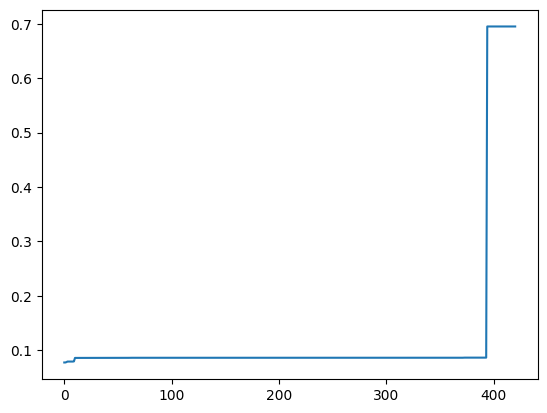

In [ ]:
tracking_optuna_fi_list =[]
for i in range(30):
  study = optuna.create_study(direction='maximize')
  study.optimize(objective_f1, n_trials=1024, n_jobs = -1)
  trial = study.best_trial
  #print('AUC: {}'.format(trial.value))
  #print("Best hyperparameters: {}".format(trial.params))
  trial, study = trial.value, study

  tracking = []
  for i in range(len(study.trials)):
    if i == 0: 
      tracking.append(study.trials[i].value)
    elif tracking[i-1] > study.trials[i].value:
      tracking.append(tracking[i-1])
    else:
      tracking.append(study.trials[i].value)
  #tracking_sorted = sorted(tracking)
  tracking_optuna_fi_list.append(tracking)
